# Cloning quasars (time to get your hands dirty). 
Let's look at the redshift distributions of the quasars in the Sloan Digital Sky Survey.

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. Operations started in 1998.

In phase 1, SDSS has released photometry data 357 million (!!!) unique sources and 1.6 million spectra. In phase 2, SDSS observed the same patch of the sky many times ("time domain astronomy", and now we're going to have LSST!)

- Upsample this distribution in hopefully two ways (but at least one of them), using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)

The package [astropy](https://www.astropy.org/) contains a ton of useful astro things. 

In [11]:
# LECTURE 4 -> CLONING QUASARS: redshift distributions of the quasars in the Sloan Digital Sky Survey
# REJECTION SAMPLING method
# INVERSE TRANSFORM method

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.datasets import fetch_dr7_quasar # data set
import astropy
import random
astropy.cosmology.Planck18
from scipy.interpolate import interp1d

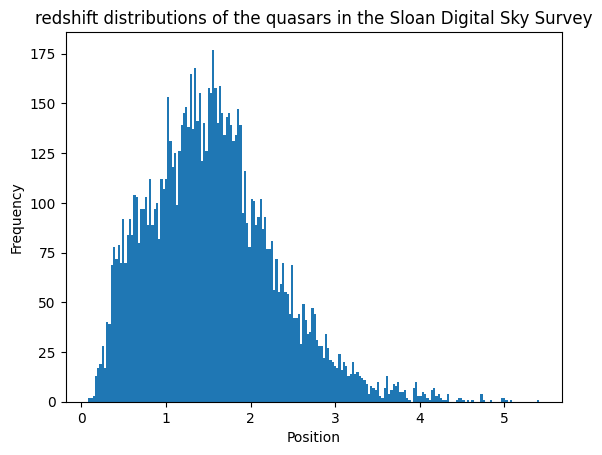

In [13]:
# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']
Nbin = int(len(z)/50)

plt.hist(z, Nbin) # number of bins = z lenght / 50
plt.title('redshift distributions of the quasars in the Sloan Digital Sky Survey')
plt.xlabel('Position')
plt.ylabel('Frequency')

plt.show()

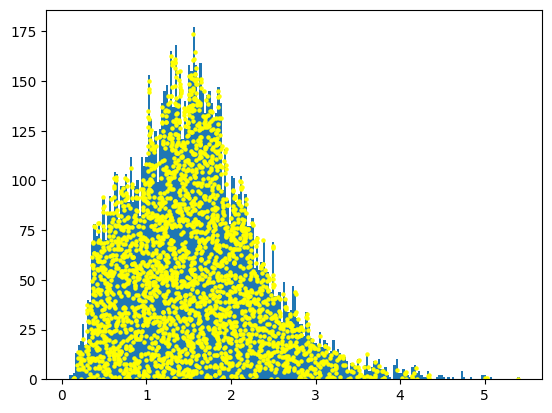

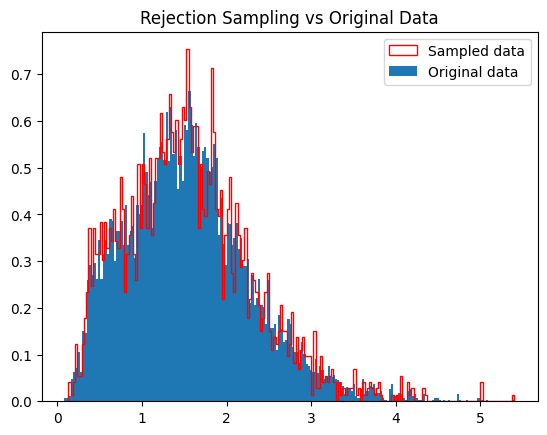

In [14]:
values, bins = np.histogram(z, int(len(z)/50)) # values = frequencies, bins = bin edges

# > REJECTION SAMPLING method
xmax = max(bins)
ymax = max(values)
N = 10000

# random samples generated by uniform distribution wide enough to capture the tails of the quasars distribution 
x = np.random.uniform(0, xmax, N)
y = np.random.uniform(0, ymax, N)

list_x = []
list_y = []

# selection of only the y values smaller/equal than the quasars distribution z(x)
for i in range(N): 
    bin_indx = np.digitize([x[i]], bins) - 1  # digitize returns the next intervall index hence the -1
    histo_value = values[bin_indx]

    if y[i] < histo_value or y[i] == histo_value:
        list_x.append(x[i])
        list_y.append(y[i])

X1 = np.array(list_x)
Y1 = np.array(list_y)
plt.hist(z, int(len(z)/50)) # number of bins = z lenght / 50
plt.scatter(X1,Y1,c='yellow', s=5)
plt.show()

plt.hist(X1, bins=int(len(z)/50),histtype='step',color='red', label='Sampled data', density= True, linewidth=1)
plt.hist(z, bins=int(len(z)/50), label='Original data', density= True) 
plt.title('Rejection Sampling vs Original Data')
plt.legend()
plt.show()

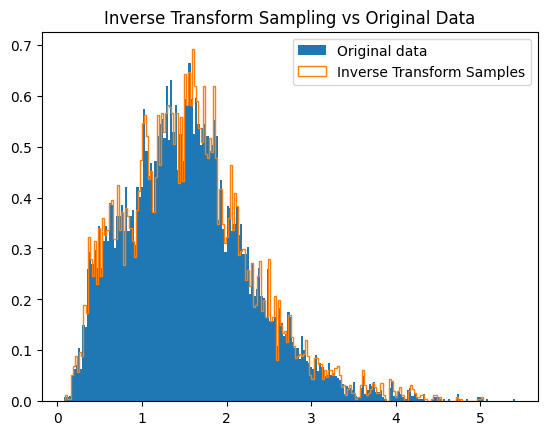

In [15]:
# > INVERSE TRANSFORM method

# To sample from z(x), we need the cdf Z(x) and its inverse, the quantile function Z^-1. 
# Generate a random sample u from a uniform random distribution [0,1].
# Using the quantile function H^-1, find the value of x below which a fraction u of the distribution is contained.
# The x value obtained is a random sample from z(x).

# Empiric CDF from data (z)
counts, bin_edges = np.histogram(z, bins=Nbin, density=True) # normalised histogram estimates pdf
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2 # central values ​​of each bin -> x values for the PDF values
pdf = counts 
cdf = np.cumsum(pdf * np.diff(bin_edges)) # vector -> cumulative sum of the areas of the histogram rectangles up to that point 
cdf = np.insert(cdf, 0, 0)  # insert cdf=0 in position 0

# Quantile function (CDF inverse): constructs an interpolation function f(y) = x
inverse_cdf = interp1d(cdf, bin_edges, bounds_error=False, fill_value=(bin_edges[0], bin_edges[-1]))

u = np.random.uniform(0, 1, N)
INVsamples = inverse_cdf(u) 

plt.hist(z, bins=int(len(z)/50), label='Original data', density=True)
plt.hist(INVsamples, bins=int(len(z)/50), label='Inverse Transform Samples', histtype='step', linewidth=1, density=True)
plt.legend()
plt.title('Inverse Transform Sampling vs Original Data')
plt.show()